# **Proyecto** - Clasificación flores de Iris
Desarrollar un modelo de aprendizaje automático para clasificar las flores de iris en sus respectivas especies basándose en medidas específicas. Las flores de iris se clasifican en tres especies: setosa, versicolor y virginica, cada una de las cuales presenta características distintas en términos de medidas. El objetivo principal será estudiar las técnicas de aprendizaje automático para construir un modelo de clasificación que pueda identificar con precisión las especies de flores de iris basándose en sus medidas.


In [34]:
import pandas as pd
import numpy as np
# import mglearn
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset

In [14]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [16]:
# Ver las 5 primeras filas del conjunto de datos
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# Recuento de filas y columnas del conjunto de datos
# Comprobación del número de filas y columnas del conjunto de datos mediante shape
print("El número de filas es: ",df.shape[0])
print("El número de columnas es: ",df.shape[1])

El número de filas es:  150
El número de columnas es:  6


In [20]:
# Información sobre el conjunto de datos
# Comprobación de la información sobre el conjunto de datos mediante info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
print("Especies:", iris_dataset['target_names'])

Especies: ['setosa' 'versicolor' 'virginica']


In [26]:
print("Características:\n", iris_dataset['feature_names'])

Características:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## ***Visualización de datos, narración de historias y experimentación con gráficos : comprender las relaciones entre variables***

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [31]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

X_train: (112, 4)
y_train: (112,)


In [32]:
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_test: (38, 4)
y_test: (38,)


#### Gráfico - 1 : distribución de las variables numéricas

In [38]:
data=df.iloc[:,1:]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


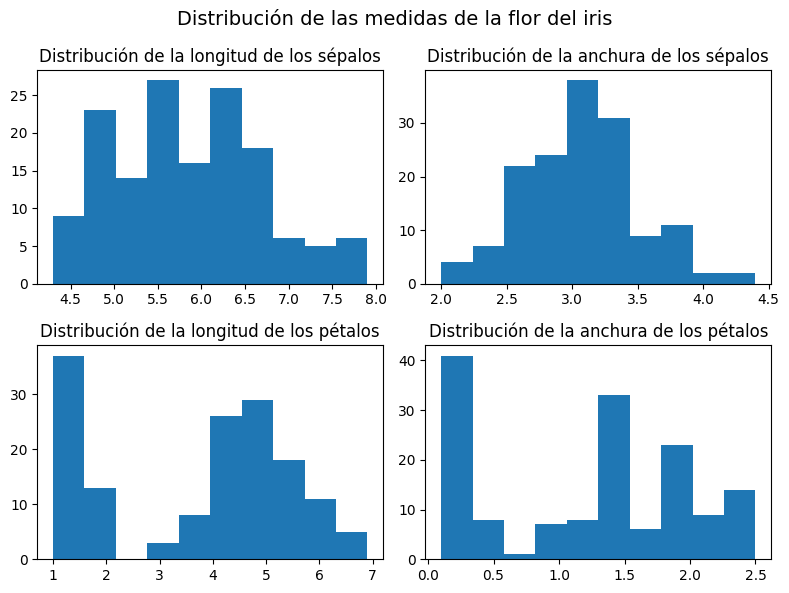

In [44]:
# Gráfico - 1 visualización de histograma para distribución de variables numéricas
# Crea una figura con subplots
plt.figure(figsize=(8, 6))
plt.suptitle('Distribución de las medidas de la flor del iris', fontsize=14)

# Crea una rejilla 2x2 de subplots
plt.subplot(2, 2, 1)  # Subplot 1
plt.hist(data['SepalLengthCm'])
plt.title('Distribución de la longitud de los sépalos')

plt.subplot(2, 2, 2)  # Subplot 2
plt.hist(data['SepalWidthCm'])
plt.title('Distribución de la anchura de los sépalos')

plt.subplot(2, 2, 3)  # Subplot 3
plt.hist(data['PetalLengthCm'])
plt.title('Distribución de la longitud de los pétalos')

plt.subplot(2, 2, 4)  # Subplot 4
plt.hist(data['PetalWidthCm'])
plt.title('Distribución de la anchura de los pétalos')

# Imprime los subplots
plt.tight_layout()
plt.show()

#### Gráfico - 2 : longitud del sépalo frente a anchura del sépalo

In [40]:
# Definir los colores para cada especie y las etiquetas de las especies correspondientes.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

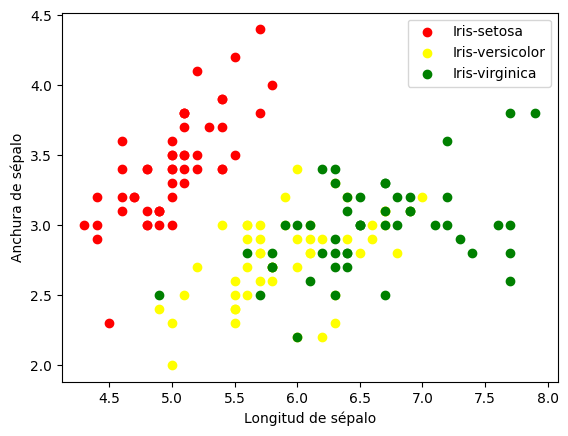

In [43]:
# Gráfico - 2 visualización del diagrama de dispersión Longitud vs Anchura del sépalo.
for i in range(3):
    # Seleccionar datos para la especie actual.
    x = data[data['Species'] == species[i]]

    # Crea un gráfico de dispersión con el color y la etiqueta especificados para la especie actual.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Añadir etiquetas a los ejes x e y.
plt.xlabel('Longitud de sépalo')
plt.ylabel('Anchura de sépalo')
# Añade una leyenda para identificar las especies en función de los colores.
plt.legend()

# Imprime el gráfico de dispersión.
plt.show()

#### Gráfico - 6 : Mapa térmico de correlación

In [48]:
print(data.dtypes)

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [49]:
corr_matrix = data.select_dtypes(include=["float64", "int64"]).corr()

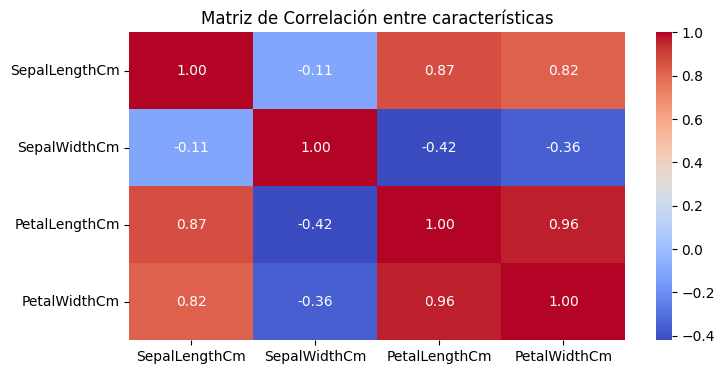

In [52]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre características")
plt.show()

## ***Implementación del modelo ML***

In [71]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    # Ajustar el modelo a los datos de entrenamiento
    model.fit(x_train, y_train)

    # hacer predicciones sobre los datos de prueba
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calcular matriz de confusión
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nMatriz de Confusión:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Etiqueta Predicha")
    ax[0].set_ylabel("Etiqueta Real")
    ax[0].set_title("Matriz de Confusión - Entrenamiento")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Etiqueta Predicha")
    ax[1].set_ylabel("Etiqueta Real")
    ax[1].set_title("Matriz de Confusión - Prueba")

    plt.tight_layout()
    plt.show()

    # calcular reporte de clasificación
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nReporte de Clasificación - Entrenamiento:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nReporte de Clasificación - Prueba:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score

In [64]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

### Modelo ML - 1 : K-Nearest Neighbors

In [53]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

NameError: name 'mglearn' is not defined

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [55]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Predicciones

In [61]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("Forma de X_new:", X_new.shape)

Forma de X_new: (1, 4)


In [62]:
prediction = knn.predict(X_new)
print("Predicción:", prediction)
print("Nombre de la categoría predicha:",
       iris_dataset['target_names'][prediction])

Predicción: [0]
Nombre de la categoría predicha: ['setosa']


In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Precisión en el conjunto de prueba: {:.2f}".format(knn.score(X_test, y_test)))

Precisión en el conjunto de prueba: 0.97


### Modelo ML - 1 : Arbol de decisiones

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt_model = DecisionTreeClassifier(random_state=20)

In [74]:
x=data.drop(columns=['Species'], axis=1)
y=data['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [76]:
y_train.value_counts()

,count
Species,
Iris-versicolor,38
Iris-setosa,34
Iris-virginica,33


In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


Matriz de Confusión:


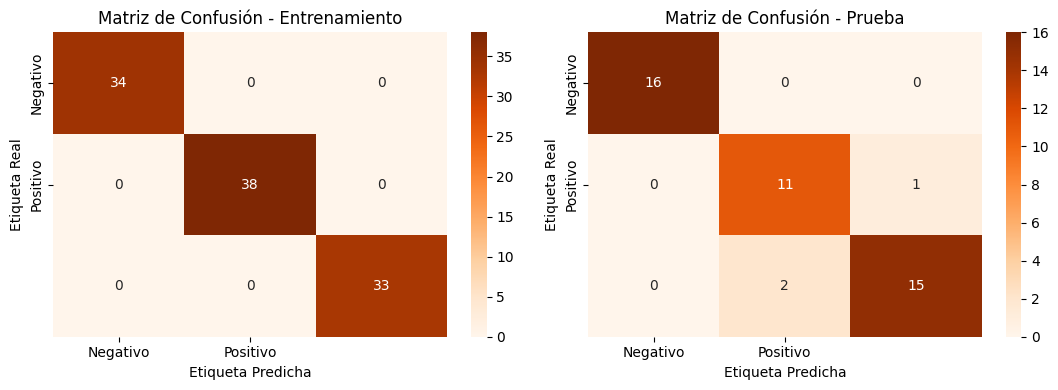


Reporte de Clasificación - Entrenamiento:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |           1 |        1 |          1 |        34 |
| Iris-versicolor |           1 |        1 |          1 |        38 |
| Iris-virginica  |           1 |        1 |          1 |        33 |
| accuracy        |           1 |        1 |          1 |         1 |
| macro avg       |           1 |        1 |          1 |       105 |
| weighted avg    |           1 |        1 |          1 |       105 |

Reporte de Clasificación - Prueba:
|                 |   precision |   recall |   f1-score |   support |
|:----------------|------------:|---------:|-----------:|----------:|
| Iris-setosa     |    1        | 1        |   1        | 16        |
| Iris-versicolor |    0.846154 | 0.916667 |   0.88     | 12        |
| Iris-virginica  |    0.9375   | 0.882353 |   0.909091 | 17        |
| accuracy 

In [82]:
# Visualización del gráfico de métricas de evaluación
dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [84]:
# Puntuación de la métrica de evaluación actualizada
score['Árbol de decisión'] = dt_score
score

,Árbol de decisión
Precision Train,1.000000
Precision Test,0.935363
Recall Train,1.000000
Recall Test,0.933333
Accuracy Train,1.000000
Accuracy Test,0.933333
F1 macro Train,1.000000
F1 macro Test,0.933657
